## Customer Churn Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading Training data
train = pd.read_csv('F:/Data science projects/Insurance_Churn_ParticipantsData/Train.csv')
train.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,labels
0,-0.276515,-0.424429,1.344997,-0.012283,0.076230,1.076648,0.182198,3,0,1,0,0,0,0,10,2,1
1,0.853573,0.150991,0.503892,-0.979179,-0.569351,-0.411453,-0.251940,4,1,2,0,1,0,0,0,3,0
2,0.947747,-0.173832,1.825628,-0.703478,0.076230,-0.411453,-0.251940,6,1,2,0,0,0,0,5,3,0
3,0.853573,-0.381404,0.984523,-0.039464,-0.569351,-0.411453,-0.251940,4,0,2,0,1,0,0,5,3,0
4,1.324443,1.590527,-1.178318,-0.097711,-0.246560,-0.411453,-0.251940,0,1,1,0,0,0,0,8,3,0


In [3]:
train.shape

(33908, 17)

In [5]:
train.describe()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,labels
count,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000
mean,-0.004158,0.002584,-0.000213,-0.000053,-0.000298,-0.004652,-0.007498,4.336381,1.171051,1.225345,0.018137,0.555503,0.159667,0.639407,5.520497,2.562375,0.116993
std,0.999776,1.014268,1.000872,1.002512,1.003724,0.993984,0.802696,3.273376,0.606730,0.749104,0.133450,0.496917,0.366303,0.897627,3.003241,0.987148,0.321417
min,-2.159994,-3.081149,-1.779108,-1.002478,-0.569351,-0.411453,-0.251940,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.747384,-0.422787,-0.938003,-0.602517,-0.569351,-0.411453,-0.251940,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,0.000000
50%,-0.182341,-0.297324,0.023260,-0.303517,-0.246560,-0.411453,-0.251940,4.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,6.000000,3.000000,0.000000
75%,0.665225,0.022901,0.624050,0.236237,0.076230,-0.411453,-0.251940,7.000000,2.000000,2.000000,0.000000,1.000000,0.000000,2.000000,8.000000,3.000000,0.000000
max,5.091402,33.094776,1.825628,18.094700,19.443647,8.127648,23.625644,11.000000,2.000000,3.000000,1.000000,1.000000,1.000000,2.000000,11.000000,3.000000,1.000000


### Exploratory Data Analysis

In [6]:
train.isnull().sum()

feature_0     0
feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
labels        0
dtype: int64

There are no missing values

In [7]:
train.dtypes

feature_0     float64
feature_1     float64
feature_2     float64
feature_3     float64
feature_4     float64
feature_5     float64
feature_6     float64
feature_7       int64
feature_8       int64
feature_9       int64
feature_10      int64
feature_11      int64
feature_12      int64
feature_13      int64
feature_14      int64
feature_15      int64
labels          int64
dtype: object

features_0 to feature_7 are continous variables

### Boxplot of continous variables

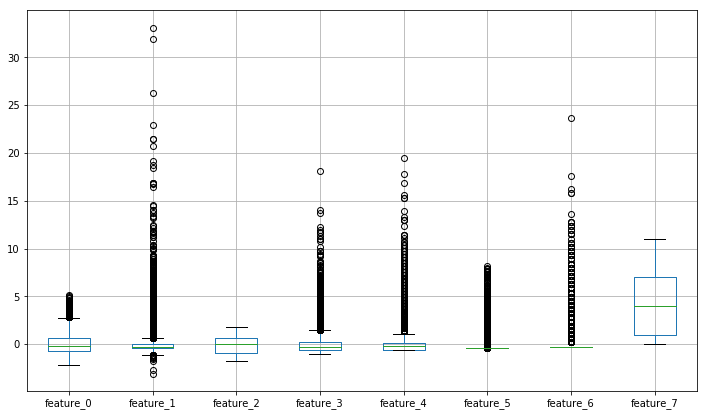

In [10]:
plt.figure(figsize=(12,7))
train.boxplot(column = ['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
                       'feature_5', 'feature_6', 'feature_7'])

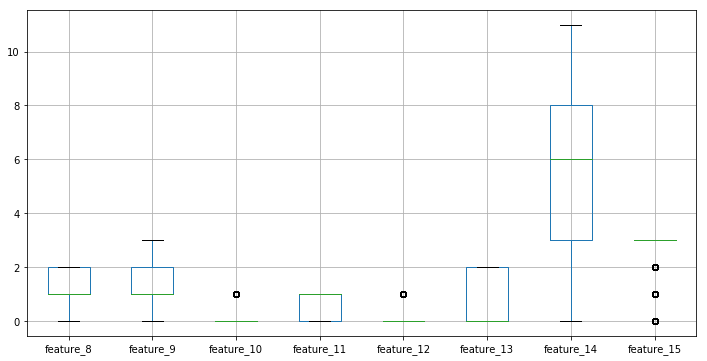

In [11]:
plt.figure(figsize=(12,6))
train.boxplot(column=['feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 
                                   'feature_13', 'feature_14', 'feature_15'])

From the plots we can see that, there are lots of outliers in each varibale.

### Histogram of continous variables

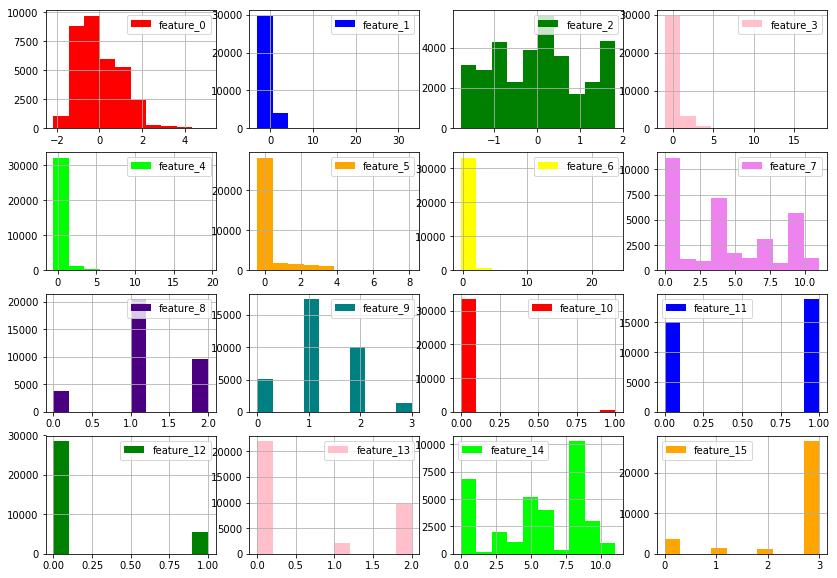

In [12]:
plt.figure(figsize=(14,10))
clr=['red','blue','green','pink','lime','orange','yellow','violet','indigo','teal','red','blue','green','pink','lime','orange']
for i,j in zip(range(1,17),train.columns[:-1]):
    plt.subplot(4,4,i)
    train[j].hist(color = clr[i-1], label=j)
    plt.legend()

### Target variable plot

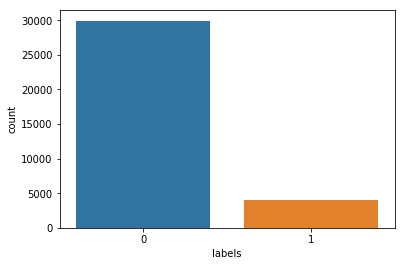

In [13]:
sns.countplot(train.labels)

### Correlation matrix plot

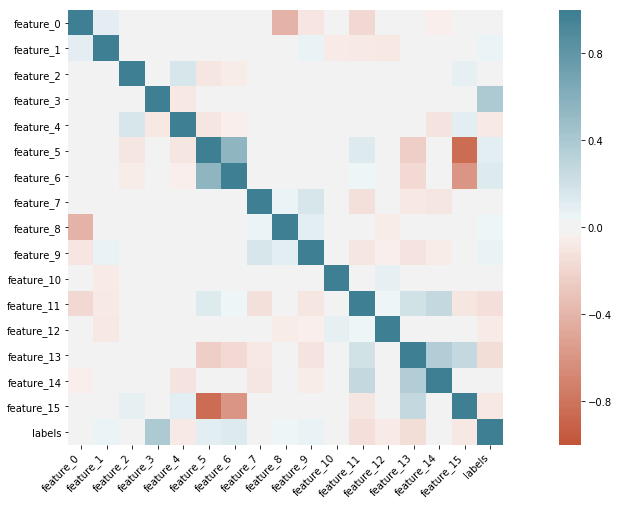

In [19]:
plt.figure(figsize=(20,8))
corr = train.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

### Model building

In [21]:
X = train.drop('labels', axis=1)
y = train.labels

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.metrics import classification_report

## 1. Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()

#Hyper parameter set
params = {
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
    'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
    'random_state':[123]}

model = GridSearchCV(dt_clf, param_grid = params, cv = 10)

best_clf_dt = model.fit(X_train, y_train)

In [25]:
y_pred = best_clf_dt.predict(X_test)
print('Accuracy score for Decision Tree: ', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy score for Decision Tree:  0.8894131524624005
             precision    recall  f1-score   support

          0       0.92      0.96      0.94      5965
          1       0.56      0.37      0.44       817

avg / total       0.87      0.89      0.88      6782



### 2. Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()

param_grid = {
    'criterion':['gini','entropy'],
          'n_estimators':[10,15,20,25,30],
          'min_samples_leaf':[1,2,3],
          'min_samples_split':[3,4,5,6,7], 
          'random_state':[123],
          'n_jobs':[-1]
}

model = GridSearchCV(rf_clf, param_grid = param_grid, cv=10)

best_clf_rf = model.fit(X_train, y_train)

y_pred = best_clf_rf.predict(X_test)
print('Accuracy score for Random Forest: ', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy score for Random Forest:  0.9059274550280153
             precision    recall  f1-score   support

          0       0.92      0.97      0.95      5965
          1       0.68      0.41      0.51       817

avg / total       0.89      0.91      0.90      6782



### 3. XG Boost

In [28]:
import xgboost as xgb

xgbmodel=xgb.XGBClassifier(learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

# Fit on data
best_clf_xgb = xgbmodel.fit(X_train, y_train)

#Predict
y_pred = best_clf_xgb.predict(X_test)

#Check Prediction Score
print("Accuracy of XGBoost: ",accuracy_score(y_test, y_pred))

#Print Classification Report
print(classification_report(y_test,y_pred))

Accuracy of XGBoost:  0.9037157180772634
             precision    recall  f1-score   support

          0       0.93      0.97      0.95      5965
          1       0.64      0.45      0.53       817

avg / total       0.89      0.90      0.90      6782



C:\Users\Nikita\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


### Conclusion: Random forest is giving more accuracy hence it will be used for test data